<h1>Baobab Plaform Opportunities Survey Data Analysis</h1>
<p>This analysis is done on a survey on 142 Baobab Platform users.
The aim of the analysis is to understand insights on opportunites sought after by the users, their experiences, and aspects they would like to see more of.
The analysis was done using Python, Pandas, numpy, Matplotlib, Seaborn, aand Jupter Notebooks.</p>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Magic command to display matplotlib plots inline
%matplotlib inline

In [11]:
df = pd.read_csv('opportunities.csv')
df.head()

,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,How frequently do you visit the Opportunities Page on the Baobab Platform?,Have you discovered opportunities on the Baobab Platform that have been of particular interest to you?,What particular aspects of opportunities are beneficial for you to know? (Please select all that accurately apply to you) - Selected Choice,"What particular aspects of opportunities are beneficial for you to know? (Please select all that accurately apply to you) - Other, please specify - Text",What feedback do you have for improving the opportunities posted on the Baobab Platform?,Are there any other platforms that you use regularly to look for opportunities? (Please select all that accurately reflect your experience) - Selected Choice,"Are there any other platforms that you use regularly to look for opportunities? (Please select all that accurately reflect your experience) - Other, please specify - Text","The Baobab team would love to connect with you and learn more about your experience using the Opportunities Board. if you'd like to be contacted by the Baobab team, please provide an email address below",UID,Q_Language
0,2025-02-07 14:30:40,2025-02-07 14:30:40,Survey Test,NaN,100,0,True,2025-02-07 14:30:40,R_datReJ23Ed6NCK2,NaN,...,Monthly,No,NaN,NaN,"Luctus leo, eleifend lacus felis? Tellus elit ...","Africa Careers Network,LinkedIn,Company websit...",Sodales tempus in temporibus purus duis! Wisi ...,testemail@qemailserver.com,NaN,NaN
1,2025-02-07 14:30:40,2025-02-07 14:30:40,Survey Test,NaN,100,0,True,2025-02-07 14:30:40,R_3faM78z8bkcColM,NaN,...,Once or twice a year,Yes,"Specified opportunity location,Specified salar...",Suscipit rhoncus morbi integer dictumst tempor...,Fringilla dui erat justo temporibus iaculis ph...,"Brighter Monday,Indeed,Instagram,Youth Opportu...","Enim, primis lacus ultrices id urna dignissim ...",testemail@qemailserver.com,NaN,NaN
2,2025-02-07 14:30:40,2025-02-07 14:30:40,Survey Test,NaN,100,0,True,2025-02-07 14:30:40,R_2hMjXlQtVgZkvoW,NaN,...,Never,No,NaN,NaN,Sapien viverra convallis vel. Integer erat por...,"Africa Careers Network,Other, please specify","Tellus, duis nonummy dui! Sed morbi suspendiss...",testemail@qemailserver.com,NaN,NaN
3,2025-02-07 14:30:40,2025-02-07 14:30:41,Survey Test,NaN,100,1,True,2025-02-07 14:30:41,R_37tMLtiddilRSaa,NaN,...,Monthly,Yes,"Specified opportunity type (Scholarships, Jobs...","Eu tempor vel! Nonummy posuere, dui pellentesq...",Porttitor diam. Per eleifend sagittis ante? Ri...,"Indeed,Facebook",NaN,testemail@qemailserver.com,NaN,NaN
4,2025-02-08 11:50:40,2025-02-08 11:56:51,Survey Preview,NaN,100,370,True,2025-02-08 11:56:52,R_6fID95ybbEw8q8K,NaN,...,Every 2-3 months,Yes,"Specified opportunity type (Scholarships, Jobs...",NaN,XX,Africa Careers Network,NaN,pgozwa@asu.edu,NaN,EN


In [13]:
print(df.columns)

Index(['Start Date', 'End Date', 'Response Type', 'IP Address', 'Progress',
       'Duration (in seconds)', 'Finished', 'Recorded Date', 'Response ID',
       'Recipient Last Name', 'Recipient First Name', 'Recipient Email',
       'External Data Reference', 'Location Latitude', 'Location Longitude',
       'Distribution Channel', 'User Language', 'Q_RecaptchaScore',
       'By clicking "I agree", you certify to the following statements:\n\n \n1. Consent with the Privacy Policy for using Baobab, an online community for young African leaders, participants, and alumni of Mastercard Foundation programs \n\n\n \n\n2. Accept the Use Policy which governs using Baobab \n\n \n\nShould any concern arise please contact support@baobabplatform.org.',
       'Which of the options below best represents your affiliation or connection to Baobab?',
       'Please select your Mastercard Foundation institution(s) you are affiliated with - Selected Choice',
       'Please select your Mastercard Foundation

<h2>Univariate Analysis</h2>

In [15]:
# Extracting statistics for the 'User Language' column
user_language_stats = df['User Language'].value_counts()

# Displaying the statistics
print(user_language_stats)


User Language
EN    124
FR     14
Name: count, dtype: int64


<h3>What is the Language distribution for our users on the Baobab Platform?</h3>

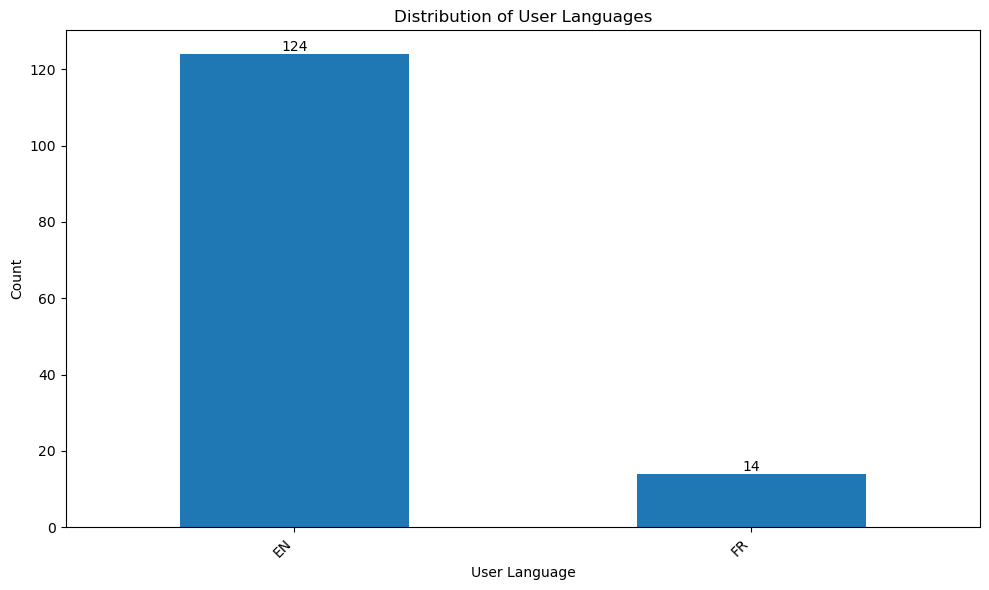

In [17]:
# Plotting the distribution of user languages with annotations
plt.figure(figsize=(10, 6))
ax = user_language_stats.plot(kind='bar')
plt.title('Distribution of User Languages')
plt.xlabel('User Language')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Annotating each bar with its count
for i, count in enumerate(user_language_stats):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


<h3>Let us now understand the affiliaton distributions for the Baobab Users</h3>

In [19]:
# Extracting statistics for the 'Which of the options below best represents your affiliation or connection to Baobab?' column
affiliation_stats = df['Which of the options below best represents your affiliation or connection to Baobab?'].value_counts()
#printing the number of users for each affiliation
print(affiliation_stats)


Which of the options below best represents your affiliation or connection to Baobab?
Mastercard Foundation Alumni (Have graduated from a Mastercard Foundation Scholars program and currently are not enrolled in a Mastercard Foundation Scholars program)    43
Mastercard Foundation Scholar (Currently enrolled in a Mastercard Foundation Scholars program at the undergraduate or master’s level)                                     31
Baobab user not affiliated with the Mastercard Foundation Scholars Program                                                                                                24
Affiliated with a different Mastercard Foundation program                                                                                                                 17
3                                                                                                                                                                          2
Name: count, dtype: int64


/var/folders/16/sdbn17sj0mdbds2tc9tgh8r00000gn/T/ipykernel_48538/4061365439.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent clipping of labels


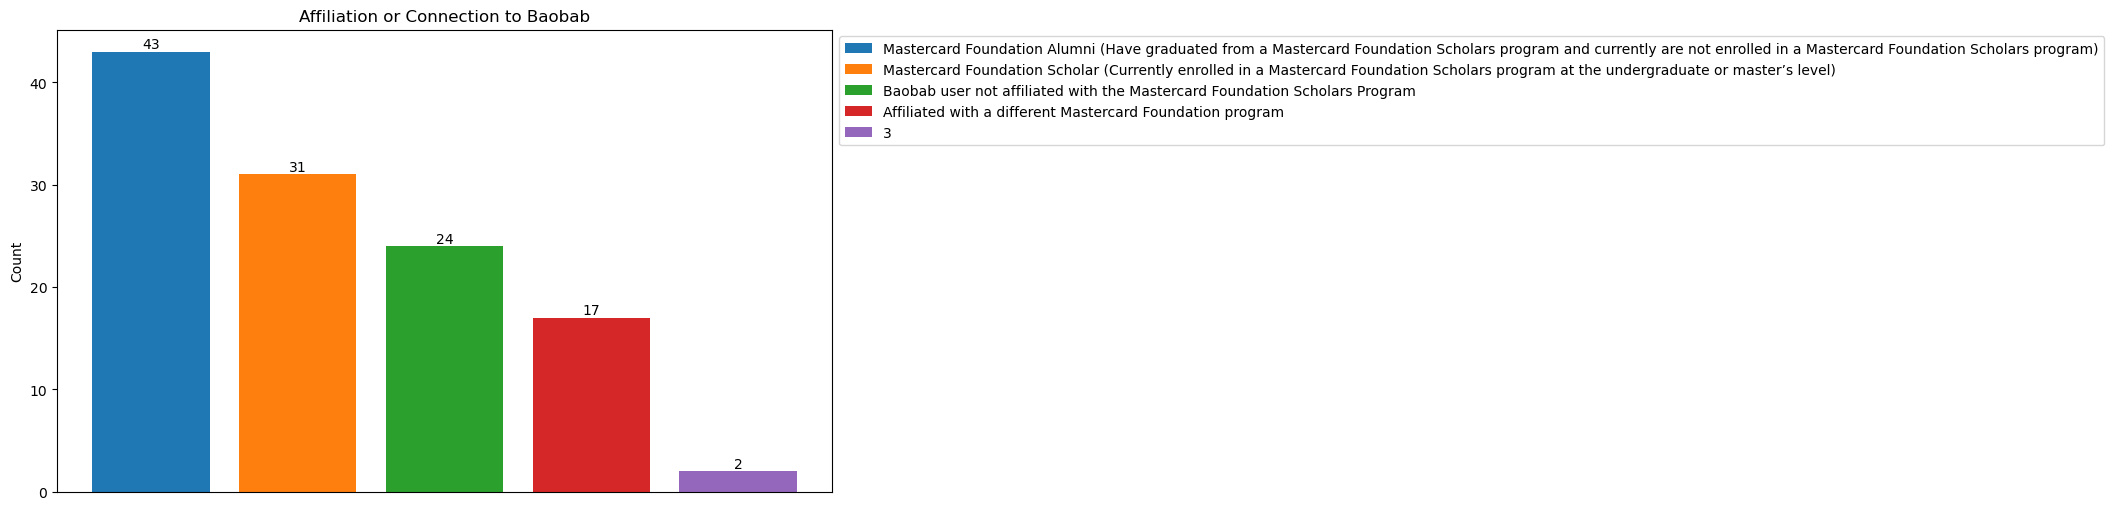

In [21]:
# Generating a list of distinct colors for each bar
colors = plt.cm.tab10(np.arange(len(affiliation_stats)))

# Plotting the distribution of affiliation/connection to Baobab with different colors for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(np.arange(len(affiliation_stats)), affiliation_stats, color=colors)

# Annotating each bar with its count
for bar, count in zip(bars, affiliation_stats):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', color='black')

# Creating a legend for the bar colors
plt.legend(bars, affiliation_stats.index, loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Affiliation or Connection to Baobab')
plt.ylabel('Count')
plt.xticks([])  # Remove x-axis ticks

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<h3>Gender distribution </h3>

In [23]:
#Extracting gender distribution
gender_distribution = df['What is your gender?'].value_counts()
#print the result
print(gender_distribution)

What is your gender?
Female    61
Male      54
Other      1
Name: count, dtype: int64


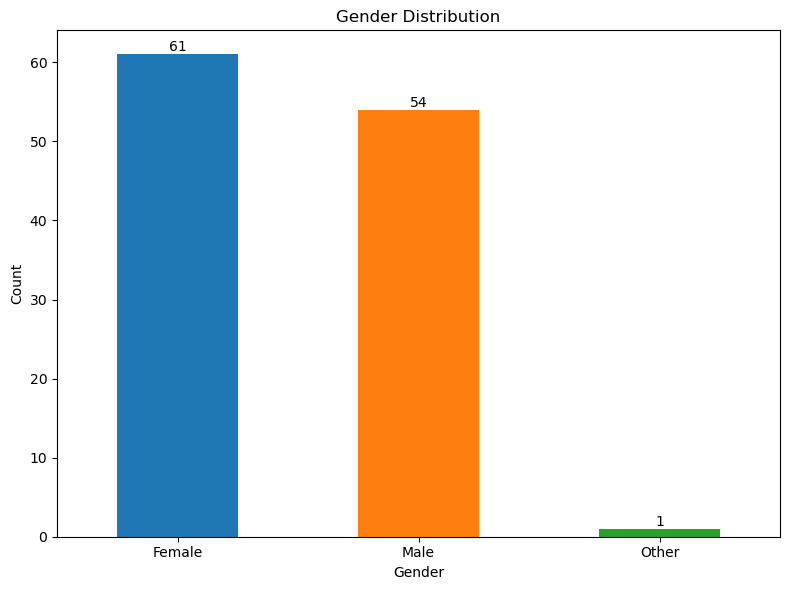

In [25]:
# Defining colors using a colormap
colors = plt.cm.tab10(np.arange(len(gender_distribution)))

# Plotting gender distribution
plt.figure(figsize=(8, 6))
gender_distribution.plot(kind='bar', color=colors)

# Annotating each bar with its count
for i, count in enumerate(gender_distribution):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

<b>57% of users identify as female<b>

<h3>Age range distribution</h3>

In [27]:
# Extracting age distribution
age_distribution = df['Select the option that represents your age:'].value_counts()
#print result
print(age_distribution)

Select the option that represents your age:
25 - 34        68
18 - 24        37
35 - 44         6
45 or above     5
Name: count, dtype: int64


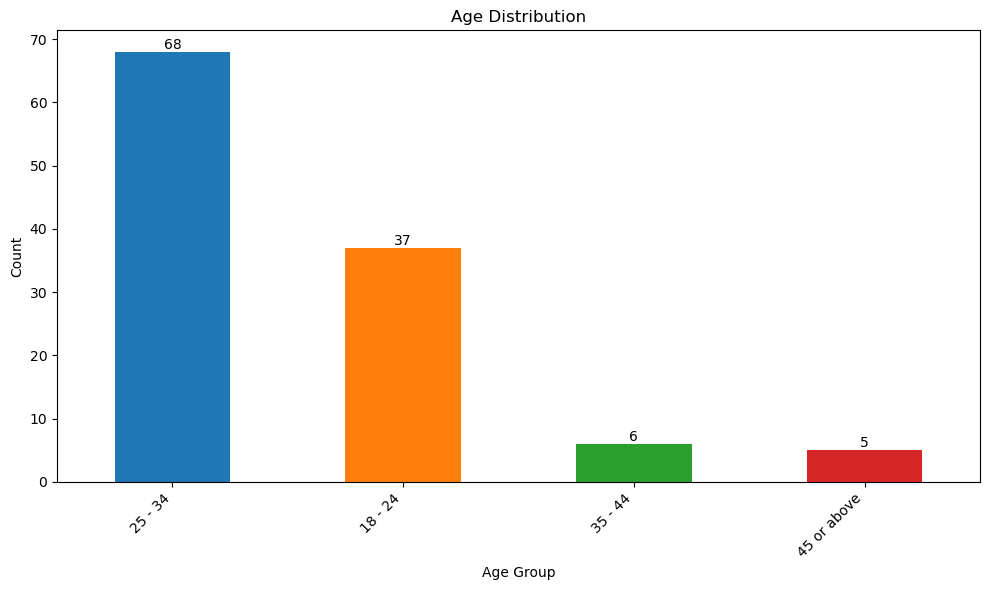

In [29]:
# Defining colors using a colormap
colors = plt.cm.tab10(np.arange(len(age_distribution)))

# Plotting age distribution
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color=colors)

# Annotating each bar with its count
for i, count in enumerate(age_distribution):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

<h3>Where are our users from: country of residence?</h3>

In [37]:


# Set the number of top countries to display
top_countries_count = 25

# Extracting top countries by residence count
top_countries = df['Where do you currently live in?'].value_counts().head(top_countries_count)



In [42]:
top_countries

Where do you currently live in?
Ghana                        21
Kenya                        16
Uganda                       15
Nigeria                      12
Rwanda                       12
South Africa                  7
Benin                         5
Ethiopia                      5
Senegal                       3
Armenia                       2
Malawi                        2
Morocco                       1
Togo                          1
Congo, Republic of the...     1
Cameroon                      1
Burundi                       1
Sudan                         1
France                        1
Malaysia                      1
Kazakhstan                    1
Algeria                       1
Bahrain                       1
Zambia                        1
United States of America      1
Kiribati                      1
Name: count, dtype: int64

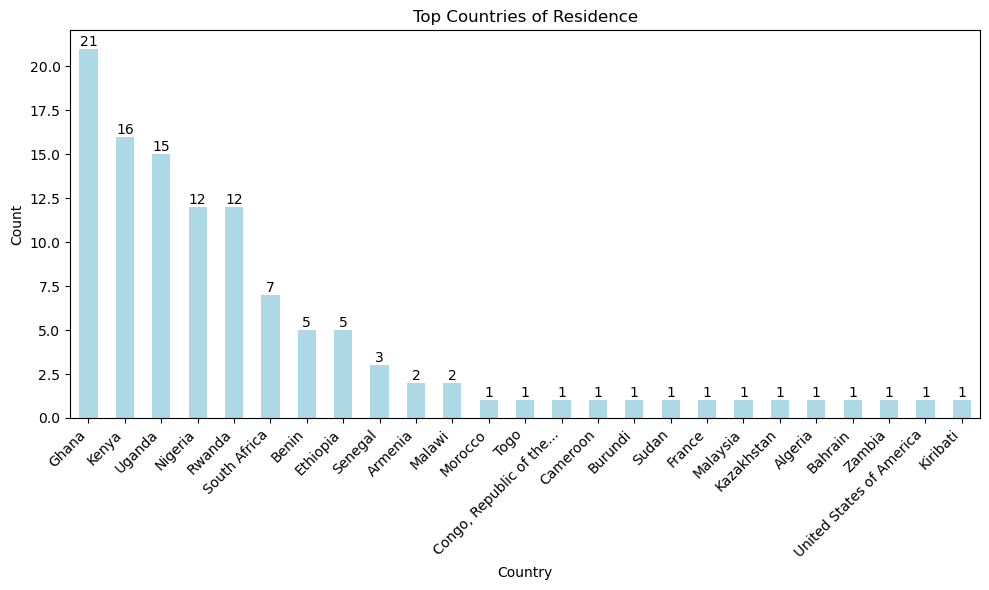

In [44]:
# Plotting the top countries
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='lightblue')

# Annotating each bar with its count
for i, count in enumerate(top_countries):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Top Countries of Residence')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<h3>Country of Birth</h3>

In [46]:
# Set the number of top countries to display
top_countries_count = 25

# Extracting top countries by residence count
top_countriesb = df['What is your country of birth?'].value_counts().head(top_countries_count)

In [48]:
top_countriesb

What is your country of birth?
Ghana                        18
Uganda                       17
Kenya                        15
Nigeria                      12
Rwanda                        8
Benin                         7
South Africa                  5
Ethiopia                      5
Barbados                      3
Malawi                        3
Senegal                       3
Burundi                       3
Zimbabwe                      2
Togo                          1
Cameroon                      1
Chad                          1
Sudan                         1
Niger                         1
Mozambique                    1
Bahrain                       1
Congo, Republic of the...     1
Trinidad and Tobago           1
Bangladesh                    1
Belarus                       1
Zambia                        1
Name: count, dtype: int64

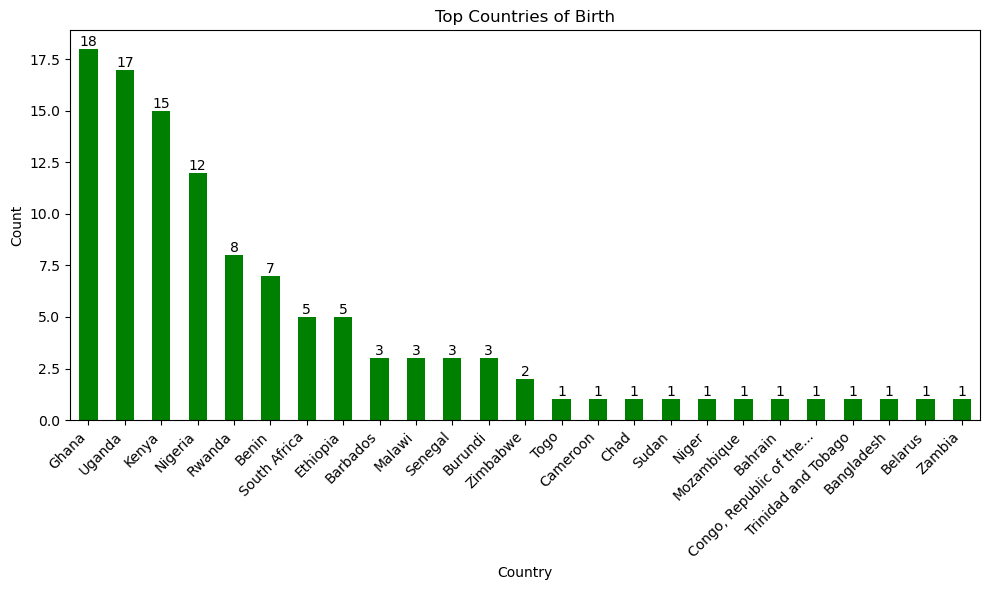

In [50]:
# Plotting the top countries
plt.figure(figsize=(10, 6))
top_countriesb.plot(kind='bar', color='green')

# Annotating each bar with its count
for i, count in enumerate(top_countriesb):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Top Countries of Birth')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<h3>Education Level</h3>

In [55]:
#Get data
education_selected_choice = df['What is the highest level of education you have COMPLETED? - Selected Choice']
education_counts = education_selected_choice.value_counts()

#print the result
print(education_counts)

What is the highest level of education you have COMPLETED? - Selected Choice
Bachelor's degree                                  64
Some university level classes but no degree        15
High school graduate, diploma or the equivalent    10
Master's degree                                     7
Other, please specify                               6
Some high school, no diploma                        5
PhD or higher degree                                4
Trade/technical/vocational training                 3
Name: count, dtype: int64


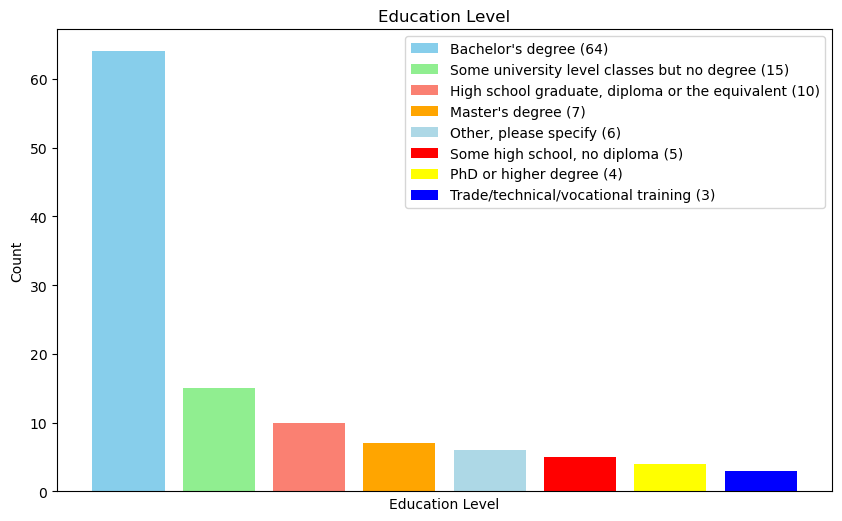

In [59]:
# Define colors and labels
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightblue', 'red', 'yellow', 'blue']
labels = education_counts.index

plt.figure(figsize=(10, 6))
bars = plt.bar(education_counts.index, education_counts, color=colors)
plt.title('Education Level')
plt.ylabel('Count')
plt.xlabel('Education Level')
plt.xticks([])

# Create custom legend
legend_labels = [f'{label} ({count})' for label, count in zip(labels, education_counts)]
plt.legend(bars, legend_labels)

plt.show()


<h3>Employement Status</h3>

In [70]:
employment_status_selected_choice = df['What is your current employment status? (Please select all that accurately apply to you) - Selected Choice']
employment_status_counts = employment_status_selected_choice.value_counts()
employment_status_counts

What is your current employment status? (Please select all that accurately apply to you) - Selected Choice
Unemployed but looking for work                                                                                                                                                               23
Student/studying                                                                                                                                                                              19
Employed full-time                                                                                                                                                                            16
Intern                                                                                                                                                                                        11
Employed part-time                                                                                                       

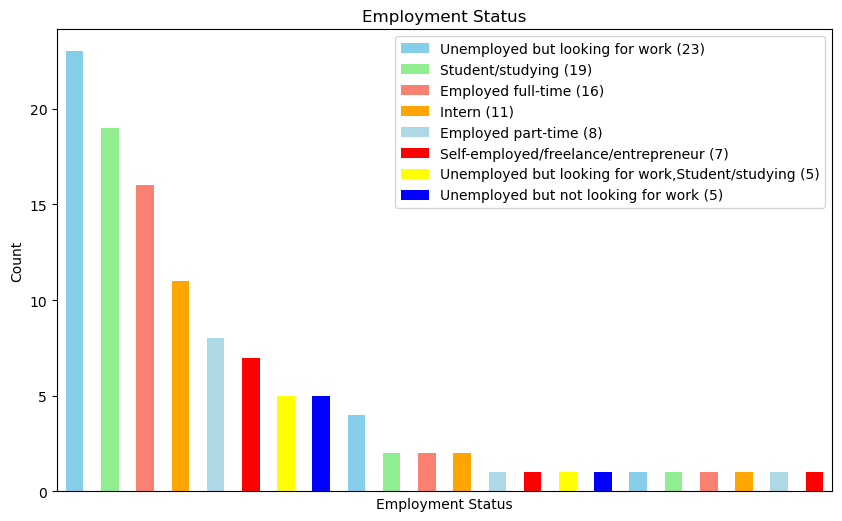

In [72]:
# Get data
employment_status_selected_choice = df['What is your current employment status? (Please select all that accurately apply to you) - Selected Choice']
employment_status_counts = employment_status_selected_choice.value_counts()
labels = employment_status_counts.index
plt.figure(figsize=(10, 6))
employment_status_counts.plot(kind='bar', color=colors)
plt.title('Employment Status')
plt.ylabel('Count')
plt.xlabel('Employment Status')
plt.xticks([])
# Create custom legend
legend_labels = [f'{label} ({count})' for label, count in zip(labels, employment_status_counts)]
plt.legend(bars, legend_labels)

plt.show()


<h3>Opportunities applied to</h3>

In [74]:
# Get data
applied_opportunity = df['Have you ever applied for an opportunity posted on the Baobab Platform?']
applied_opportunity_counts = applied_opportunity.value_counts()

print(applied_opportunity_counts)

Have you ever applied for an opportunity posted on the Baobab Platform?
No     59
Yes    55
Name: count, dtype: int64


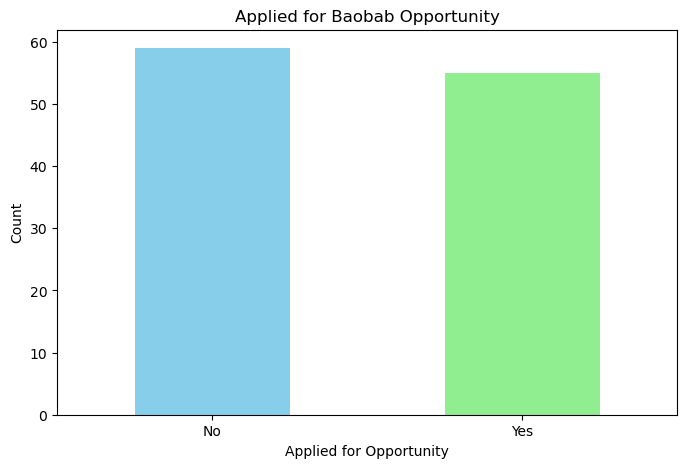

In [76]:
plt.figure(figsize=(8, 5))
applied_opportunity_counts.plot(kind='bar', color=colors)
plt.title('Applied for Baobab Opportunity')
plt.ylabel('Count')
plt.xlabel('Applied for Opportunity')
plt.xticks(rotation=0)
plt.show()

<h3>Assistance in Applications</h3>

In [81]:
# Get data
received_assistance = df['Did you receive assistance with the application process from any of the following sources? (Please select all that accurately apply to you) - Selected Choice']
received_assistance_counts = received_assistance.value_counts()
print(received_assistance_counts)

Did you receive assistance with the application process from any of the following sources? (Please select all that accurately apply to you) - Selected Choice
A Mastercard Foundation Scholar or Alumni                                                    7
A friend                                                                                     5
A Mastercard Foundation Scholar or Alumni,A friend                                           4
Skills for Success                                                                           3
Opportunities Avenue                                                                         2
A Mastercard Foundation Scholar or Alumni,Opportunities Avenue,None,Other, please specify    1
A Mastercard Foundation Scholar or Alumni,Skills for Success,The Afrijob Network             1
The Afrijob Network                                                                          1
Talenteum                                                                         

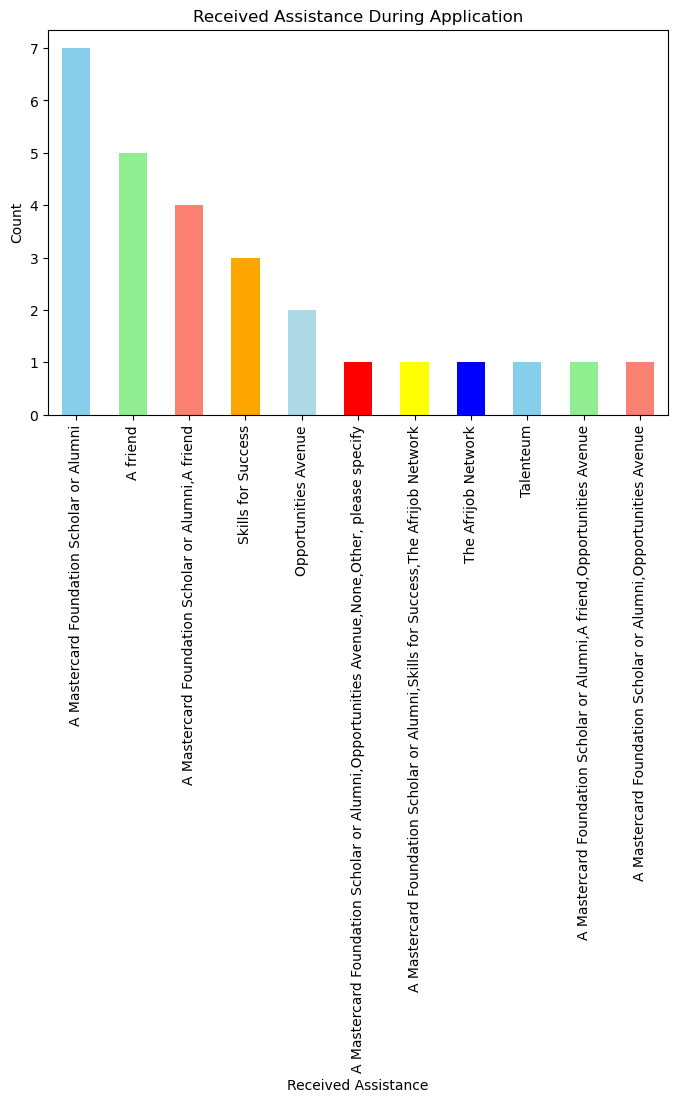

In [87]:
plt.figure(figsize=(8, 5))
received_assistance_counts.plot(kind='bar', color=colors)
plt.title('Received Assistance During Application')
plt.ylabel('Count')
plt.xlabel('Received Assistance')
plt.xticks(rotation=90)
plt.show()

<h3>Exact Opportunities</h3>

In [95]:
exact_counts = df['What type of opportunities did you apply for? (Please select all that accurately apply to you) - Selected Choice'].value_counts()
exact_counts

What type of opportunities did you apply for? (Please select all that accurately apply to you) - Selected Choice
Internships                                                   10
Jobs,Internships                                               8
Jobs                                                           5
Internships,Scholarships                                       5
Grants                                                         4
Scholarships                                                   3
Jobs,Internships,Scholarships                                  3
Jobs,Scholarships,Grants                                       2
Jobs,Scholarships                                              2
Other, please specify                                          2
Internships,Grants                                             1
Internships,Scholarships,Grants                                1
Jobs,Internships,Scholarships,Grants,Other, please specify     1
Jobs,Internships,Scholarships,Grants      

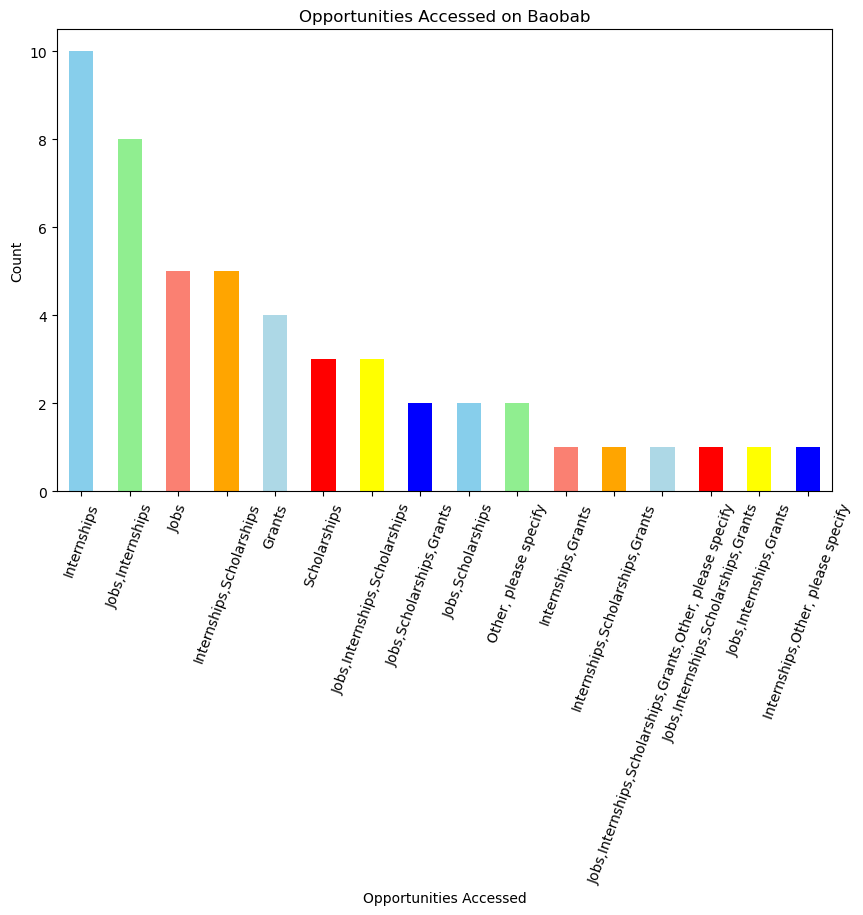

In [101]:
plt.figure(figsize=(10, 6))
exact_counts.plot(kind='bar', color=colors)
plt.title('Opportunities Accessed on Baobab')
plt.ylabel('Count')
plt.xlabel('Opportunities Accessed')
plt.xticks(rotation=70)
plt.show()

In [103]:
number_opportunities = df['How many opportunities have you applied to on the Baobab Platform?'].value_counts()
number_opportunities

How many opportunities have you applied to on the Baobab Platform?
1 Opportunity              15
2 Opportunities            13
4 Opportunities             6
6 or more Opportunities     6
5 Opportunities             4
3 Opportunities             3
3                           1
2                           1
14                          1
Name: count, dtype: int64

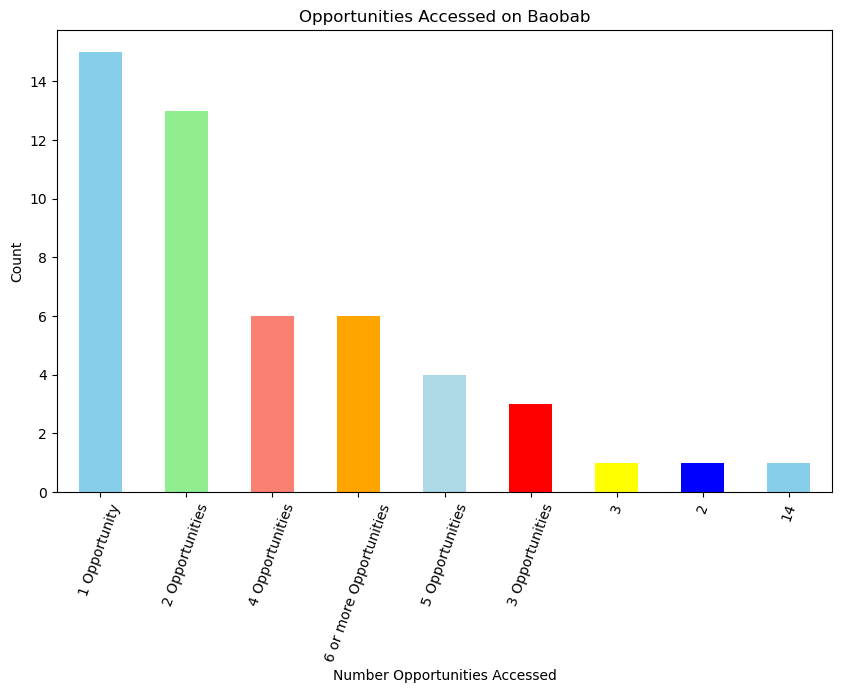

In [105]:
plt.figure(figsize=(10, 6))
number_opportunities.plot(kind='bar', color=colors)
plt.title('Opportunities Accessed on Baobab')
plt.ylabel('Count')
plt.xlabel('Number Opportunities Accessed')
plt.xticks(rotation=70)
plt.show()

<h3>Application Stage</h3>

In [107]:
# Drop NaN values from the column
cleaned_data = df['What stage of the application process did you reach after submitting your application? - Opportunity #1'].dropna()

# Get the counts of each unique value
value_counts = cleaned_data.value_counts()
print(value_counts)

What stage of the application process did you reach after submitting your application? - Opportunity #1
Job/ Scholarship/ Grant offered/awarded    8
I haven't heard back                       5
Opportunity not awarded                    2
1                                          1
Qualified for an interview                 1
Name: count, dtype: int64


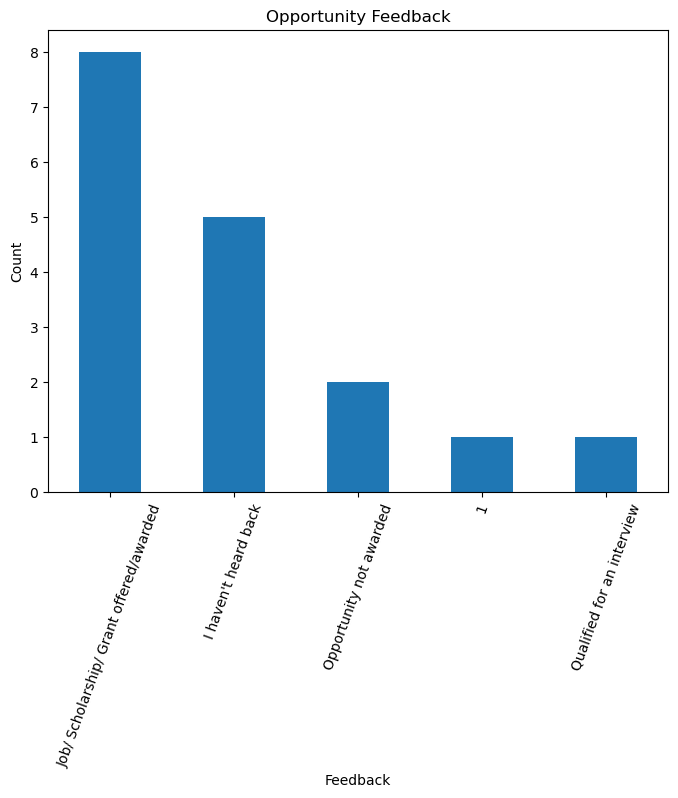

In [111]:


# Plot the data
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar')
plt.title('Opportunity Feedback')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()


In [114]:
poster = df['Who posted the opportunity on the Baobab platform? (Please select all that accurately apply to you) - Selected Choice'].value_counts()
poster

Who posted the opportunity on the Baobab platform? (Please select all that accurately apply to you) - Selected Choice
Mastercard Foundation Transitions Community                         6
I do not remember                                                   6
Mastercard Foundation Transitions Community,Opportunities Avenue    3
Other, please specify                                               2
Mastercard Foundation Transitions Community,I do not remember       1
Skills for Success                                                  1
Opportunities Avenue                                                1
Mastercard Foundation Transitions Community,The Afrijob Network     1
Name: count, dtype: int64

<h3>Job Offers</h3>

<h2>Bivariate Analysis: What are some correlations?</h2>

In [134]:
# Display summary stats grouped by gender
df.groupby("What is your gender?")["How many opportunities have you applied to on the Baobab Platform?"].describe()

,count,unique,top,freq
What is your gender?,,,,
Female,28,7,2 Opportunities,10
Male,21,6,1 Opportunity,10
Other,1,1,2,1


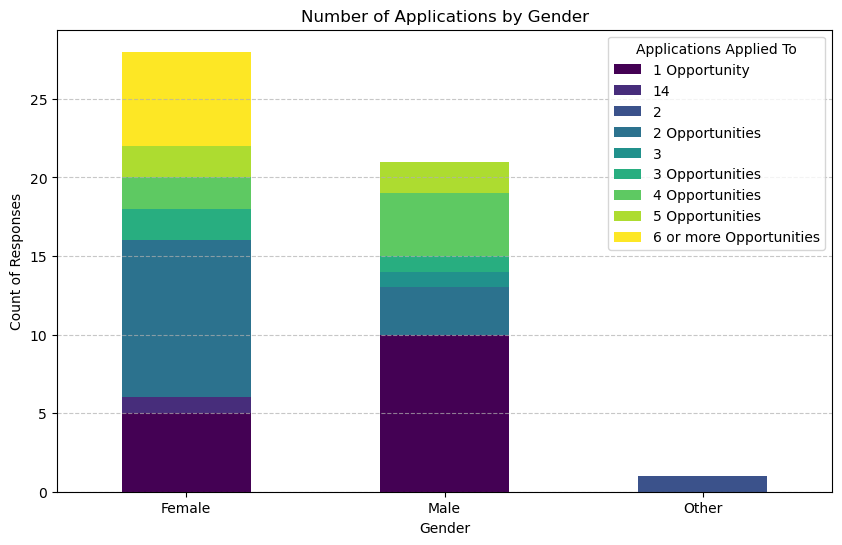

In [138]:
#Count occurrences of each category within each gender
gender_vs_applications = df.groupby(["What is your gender?", "How many opportunities have you applied to on the Baobab Platform?"]).size().unstack()

# Plot stacked bar chart
gender_vs_applications.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")

# Customize labels and title
plt.title("Number of Applications by Gender")
plt.xlabel("Gender")
plt.ylabel("Count of Responses")
plt.xticks(rotation=0)  # Keep gender labels readable
plt.legend(title="Applications Applied To", bbox_to_anchor=(1,1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

<h3>Opportunities vs Affiliation</h3>

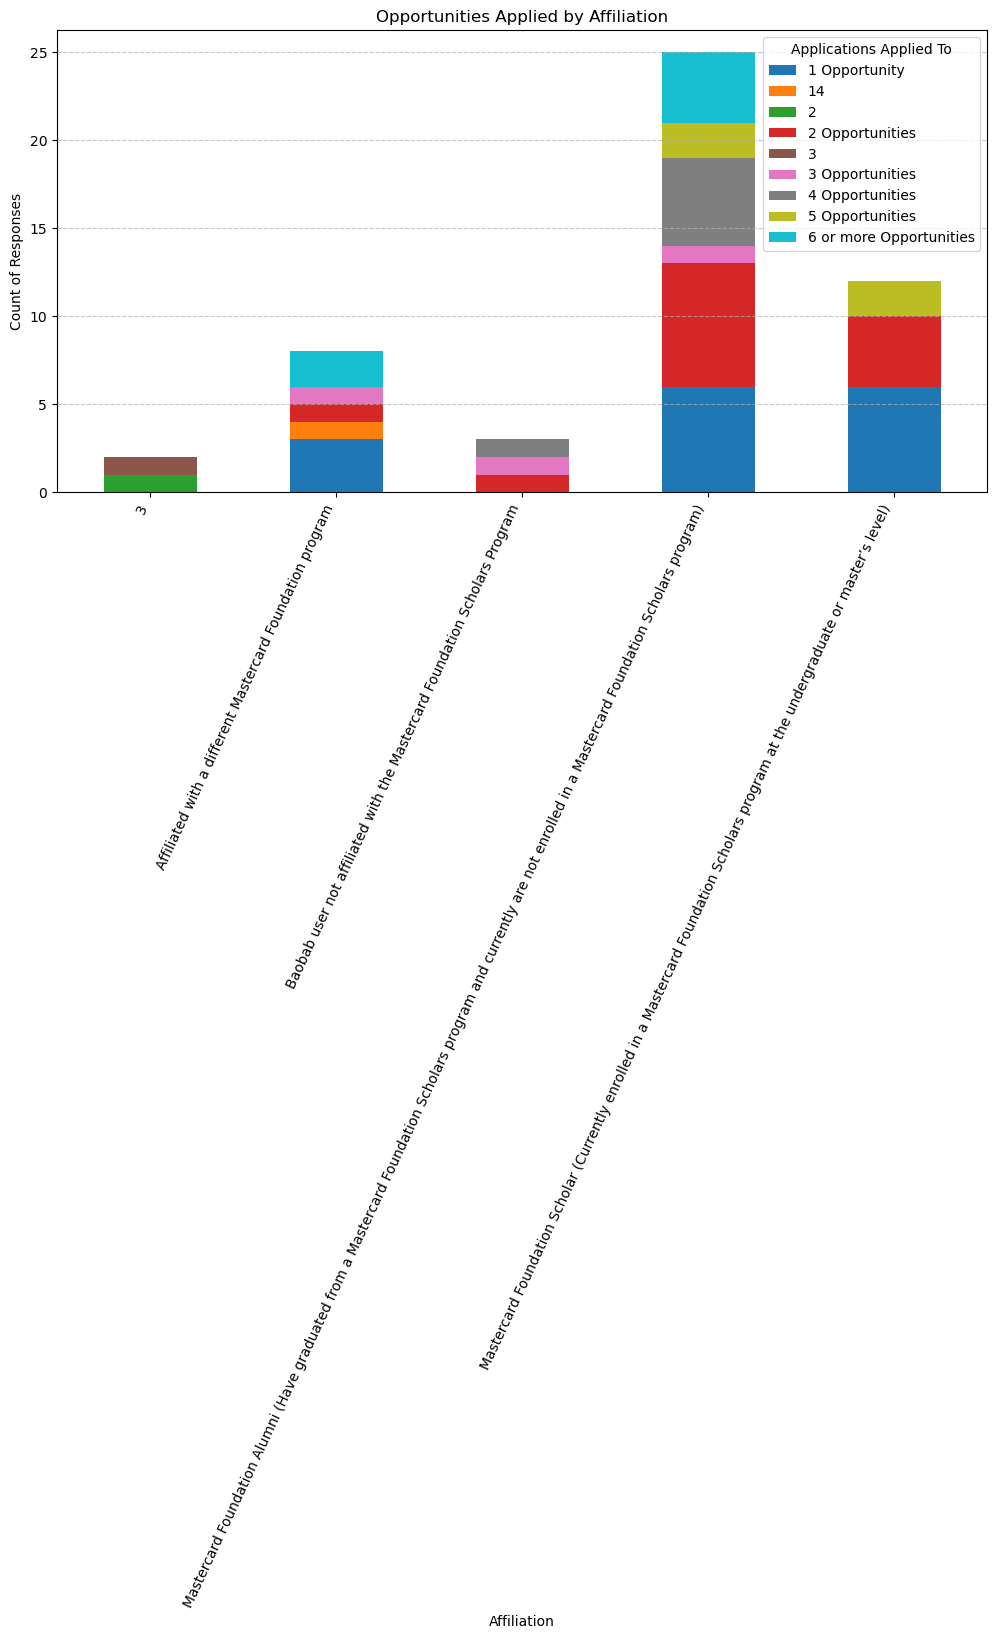

In [149]:
# Group by affiliation and opportunities applied, then count occurrences
affiliation_vs_applications = df.groupby(
    ["Which of the options below best represents your affiliation or connection to Baobab?", 
     "How many opportunities have you applied to on the Baobab Platform?"]).size().unstack()

# Plot stacked bar chart
affiliation_vs_applications.plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab10")

# Customize labels and title
plt.title("Opportunities Applied by Affiliation")
plt.xlabel("Affiliation")
plt.ylabel("Count of Responses")
plt.xticks(rotation=65, ha="right")  # Rotate for readability
plt.legend(title="Applications Applied To", bbox_to_anchor=(1,1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

<h3>Country of residence vs Number of Opportunities Accessed</h3>

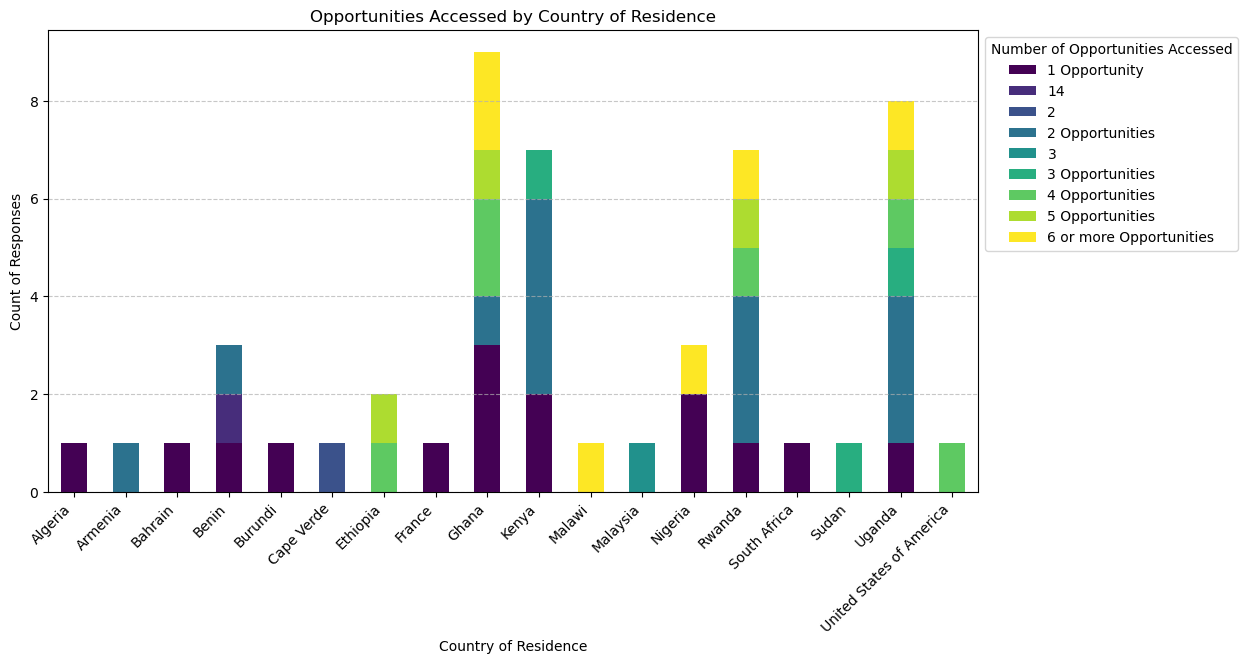

In [151]:
# Group by country of residence and opportunities applied, then count occurrences
country_vs_opportunities = df.groupby(
    ["Where do you currently live in?", 
     "How many opportunities have you applied to on the Baobab Platform?"]).size().unstack()

# Plot stacked bar chart
country_vs_opportunities.plot(kind="bar", stacked=True, figsize=(12,6), colormap="viridis")

# Customize labels and title
plt.title("Opportunities Accessed by Country of Residence")
plt.xlabel("Country of Residence")
plt.ylabel("Count of Responses")
plt.xticks(rotation=45, ha="right")  # Rotate for readability
plt.legend(title="Number of Opportunities Accessed", bbox_to_anchor=(1,1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

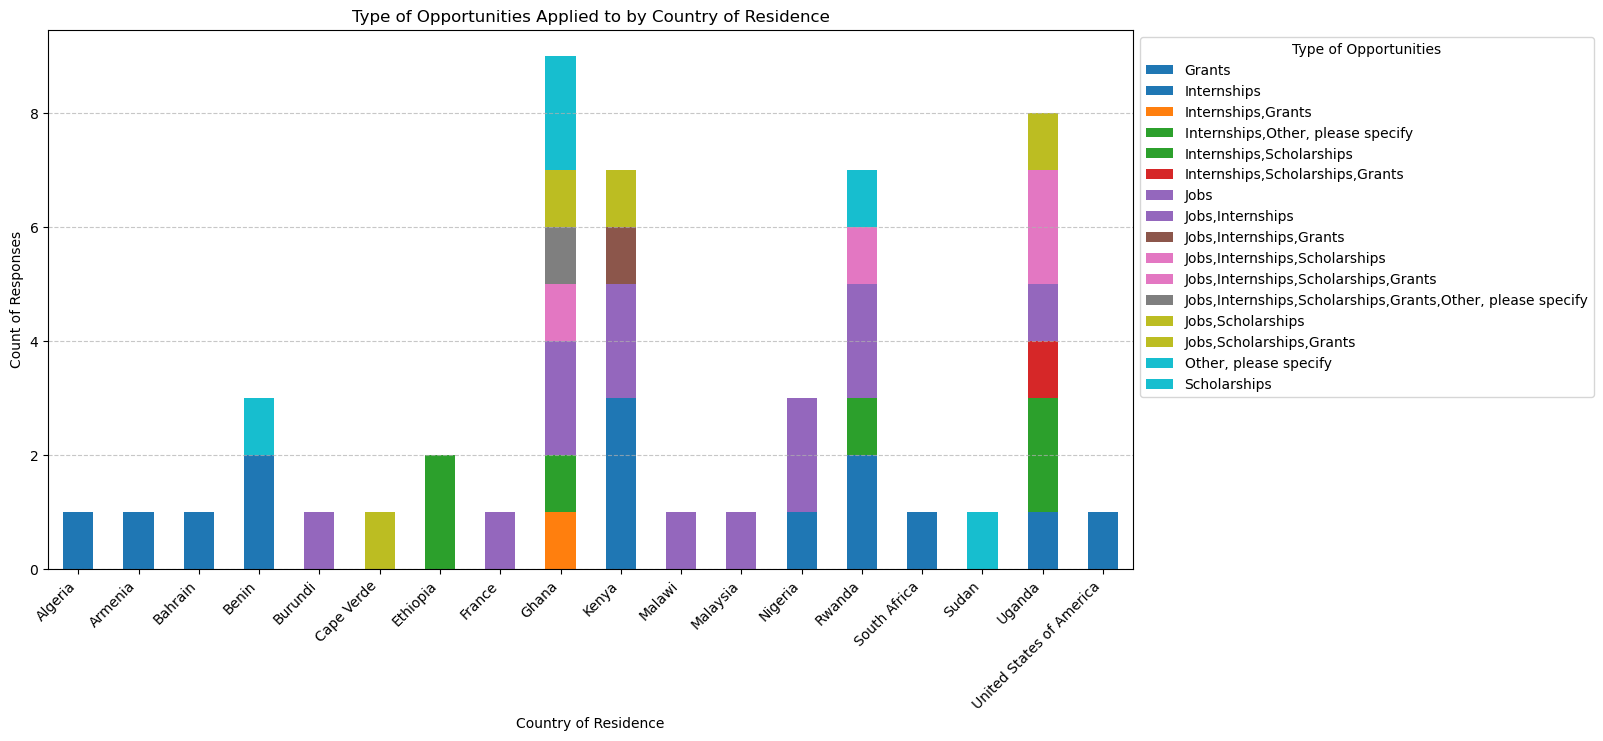

In [153]:
# Group by country of residence and type of opportunities applied for
country_vs_opportunity_type = df.groupby(
    ["Where do you currently live in?", 
     "What type of opportunities did you apply for? (Please select all that accurately apply to you) - Selected Choice"]
).size().unstack()

# Plot stacked bar chart
country_vs_opportunity_type.plot(kind="bar", stacked=True, figsize=(14,7), colormap="tab10")

# Customize labels and title
plt.title("Type of Opportunities Applied to by Country of Residence")
plt.xlabel("Country of Residence")
plt.ylabel("Count of Responses")
plt.xticks(rotation=45, ha="right")  # Rotate for readability
plt.legend(title="Type of Opportunities", bbox_to_anchor=(1,1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

Female users apply more than male users, with a total of 99, and male counterparts with 71 applications

<h2>Multivariate Analysis</h2>

In [161]:
# Group by country, gender, and opportunity type
country_gender_opportunity = df.groupby(
    ["Where do you currently live in?", "What is your gender?", 
     "What type of opportunities did you apply for? (Please select all that accurately apply to you) - Selected Choice"]
).size().unstack()



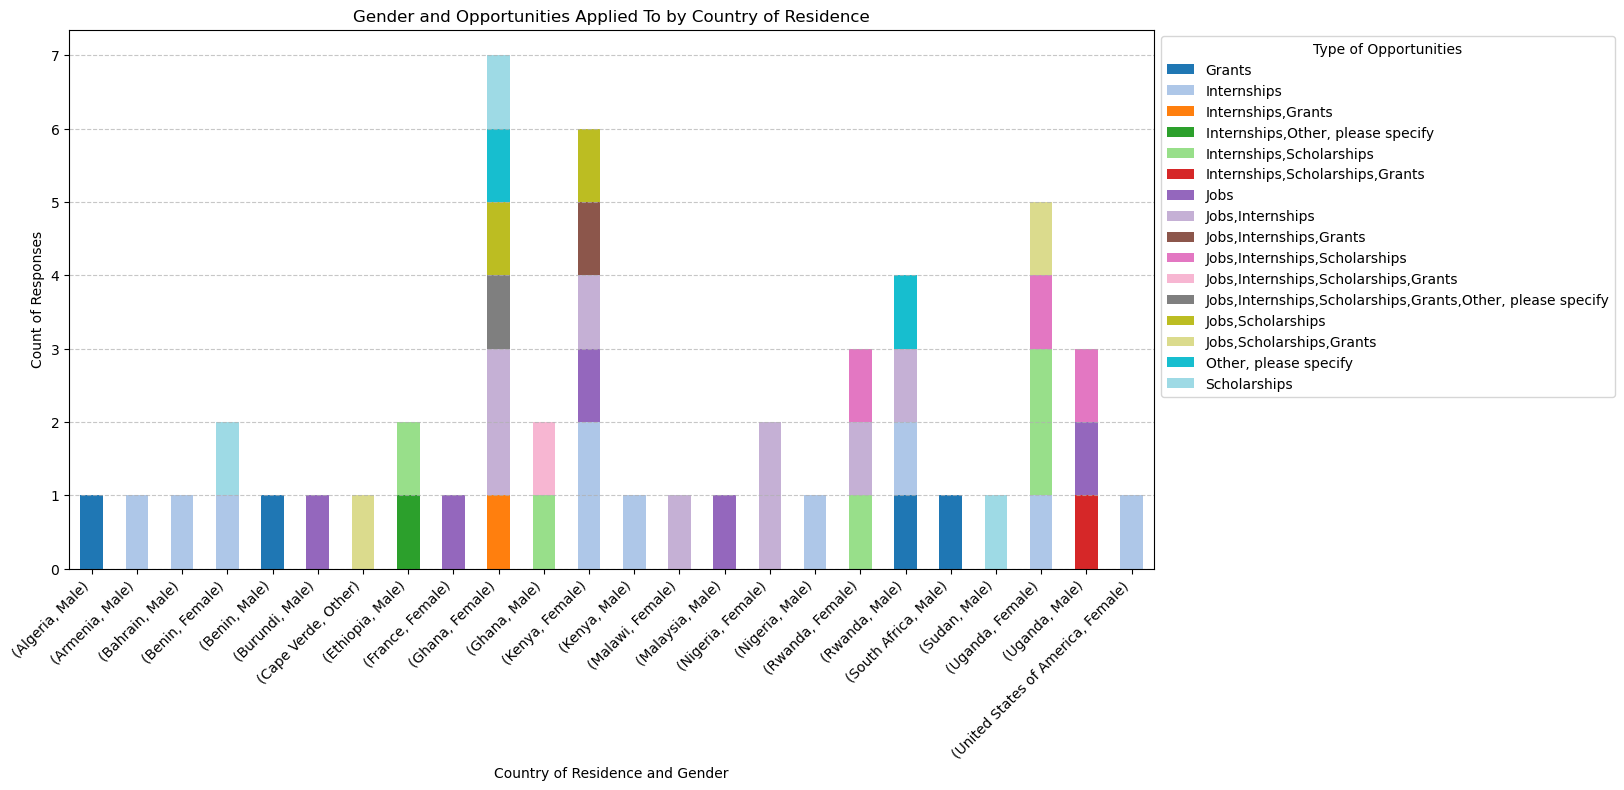

In [163]:
# Plot stacked bar chart
country_gender_opportunity.plot(kind="bar", stacked=True, figsize=(14,7), colormap="tab20")

# Customize labels and title
plt.title("Gender and Opportunities Applied To by Country of Residence")
plt.xlabel("Country of Residence and Gender")
plt.ylabel("Count of Responses")
plt.xticks(rotation=45, ha="right")  # Rotate for readability
plt.legend(title="Type of Opportunities", bbox_to_anchor=(1,1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


In [176]:
import seaborn as sns

# Create the pivot table for education, employment, and opportunity type
education_employment_opportunity = df.groupby(
    ["What is the highest level of education you have COMPLETED? - Selected Choice", 
     "What is your current employment status? (Please select all that accurately apply to you) - Selected Choice", 
     "What type of opportunities did you apply for? (Please select all that accurately apply to you) - Selected Choice"]
).size().unstack(fill_value=0)

# Display the resulting dataframe

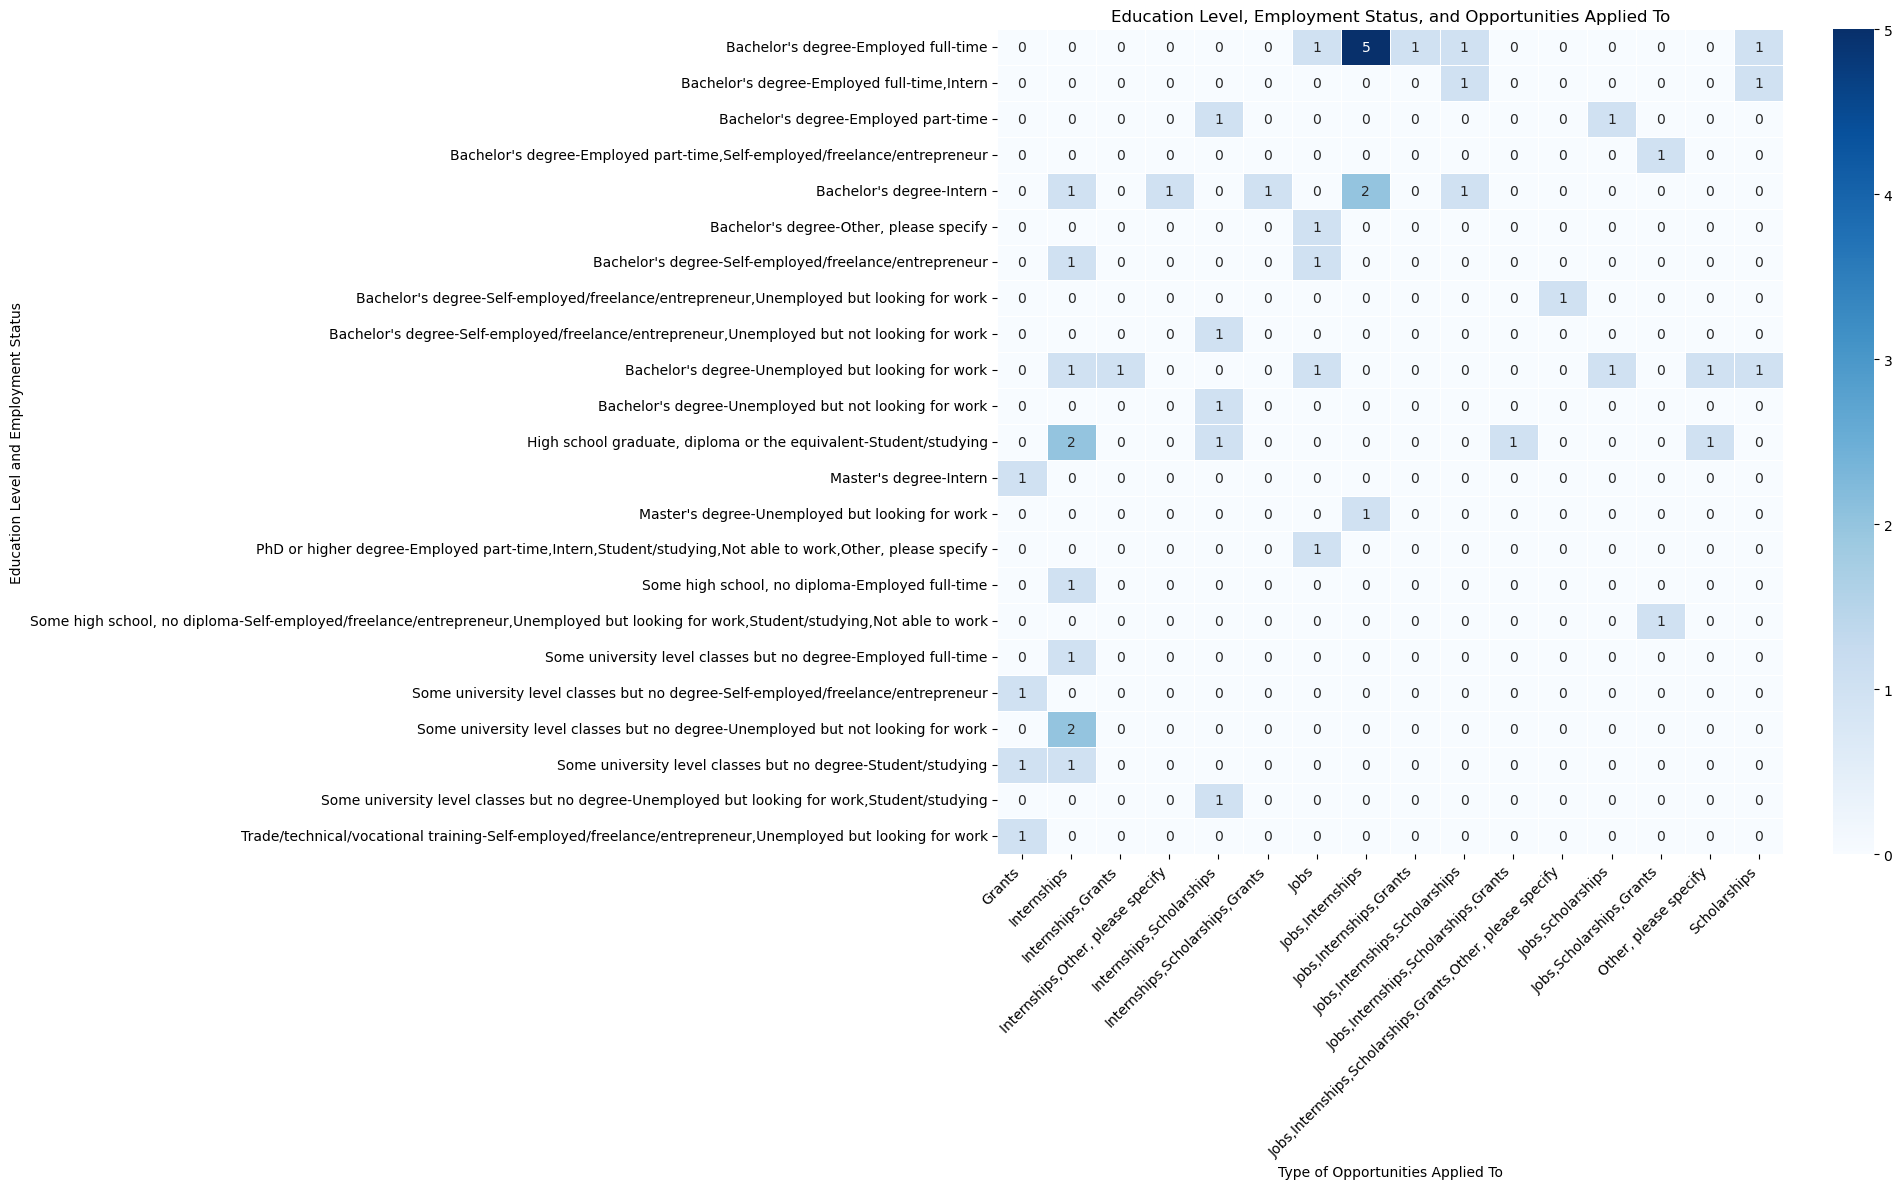

In [180]:
# Create a heatmap for visualizing the relationships
plt.figure(figsize=(20, 12))
sns.heatmap(education_employment_opportunity, annot=True, cmap="Blues", fmt="d", linewidths=.5)

# Customize the plot
plt.title("Education Level, Employment Status, and Opportunities Applied To")
plt.xlabel("Type of Opportunities Applied To")
plt.ylabel("Education Level and Employment Status")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels readable
plt.tight_layout()  # Adjust layout for readability

# Show the plot
plt.show()


<h3>Country of birth vs Education Level vs Opportunities accessed</h3>

In [185]:
# Create the pivot table for country of birth, education level, and opportunities accessed
country_education_opportunity = df.groupby(
    ["What is your country of birth?", 
     "What is the highest level of education you have COMPLETED? - Selected Choice", 
     "How many opportunities have you applied to on the Baobab Platform?"]
).size().unstack(fill_value=0)

# Display the resulting dataframe
print(country_education_opportunity)


How many opportunities have you applied to on the Baobab Platform?                 1 Opportunity  \
What is your country of birth? What is the highest level of education you have...                  
Bahrain                        PhD or higher degree                                            0   
Bangladesh                     Some high school, no diploma                                    1   
Barbados                       Some university level classes but no degree                     0   
Benin                          Some university level classes but no degree                     1   
                               Bachelor's degree                                               0   
                               Master's degree                                                 1   
Burundi                        Some university level classes but no degree                     1   
                               Bachelor's degree                                               1   


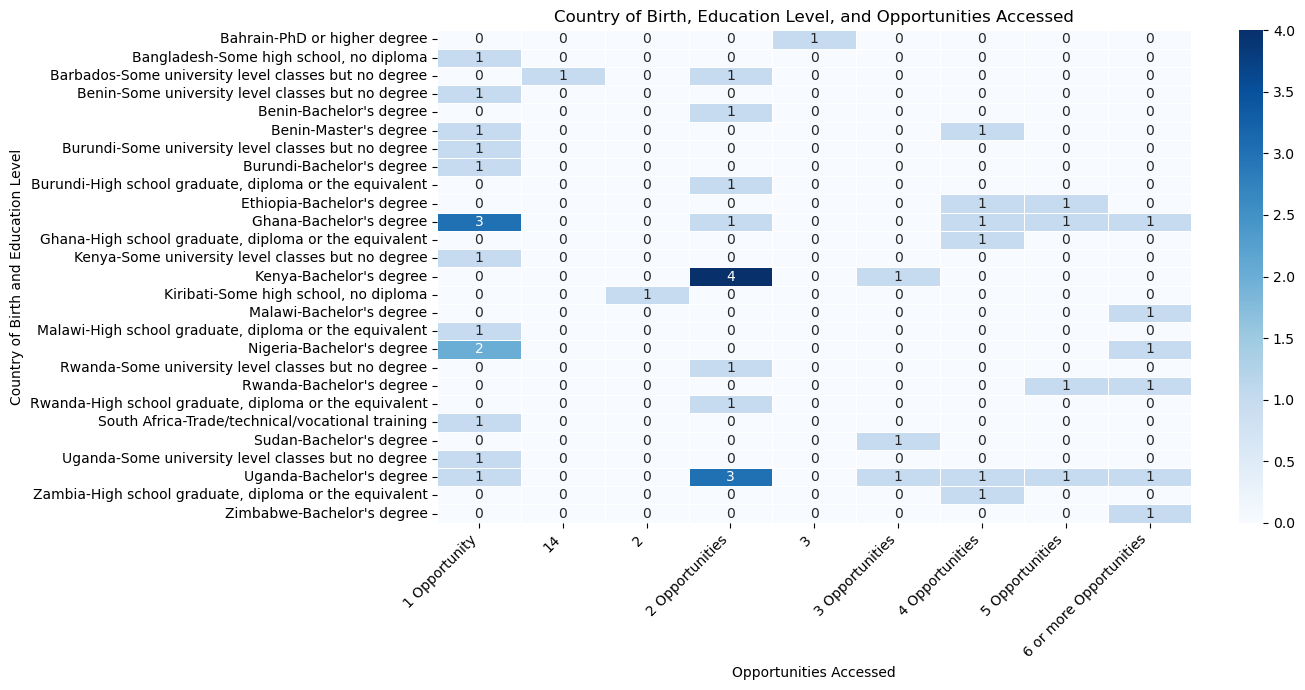

In [189]:
# Create a heatmap for visualizing the relationships
plt.figure(figsize=(14, 7))
sns.heatmap(country_education_opportunity, annot=True, cmap="Blues", fmt="d", linewidths=.5)

# Customize the plot
plt.title("Country of Birth, Education Level, and Opportunities Accessed")
plt.xlabel("Opportunities Accessed")
plt.ylabel("Country of Birth and Education Level")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels readable
plt.tight_layout()  # Adjust layout for readability

# Show the plot
plt.show()


<h3>Opportunities  vs country of residence vs gender</h3>

In [194]:
# Create the pivot table for Opportunities, Country of Residence, and Gender
opportunities_country_gender = df.groupby(
    ["Where do you currently live in?",  # Country of Residence
     "What is your gender?",  # Gender
     "How many opportunities have you applied to on the Baobab Platform?"]  # Opportunities Accessed
).size().unstack(fill_value=0)

# Display the resulting dataframe
print(opportunities_country_gender)


How many opportunities have you applied to on the Baobab Platform?  1 Opportunity  \
Where do you currently live in? What is your gender?                                
Algeria                         Male                                            1   
Armenia                         Male                                            0   
Bahrain                         Male                                            1   
Benin                           Female                                          0   
                                Male                                            1   
Burundi                         Male                                            1   
Cape Verde                      Other                                           0   
Ethiopia                        Male                                            0   
France                          Female                                          1   
Ghana                           Female                           

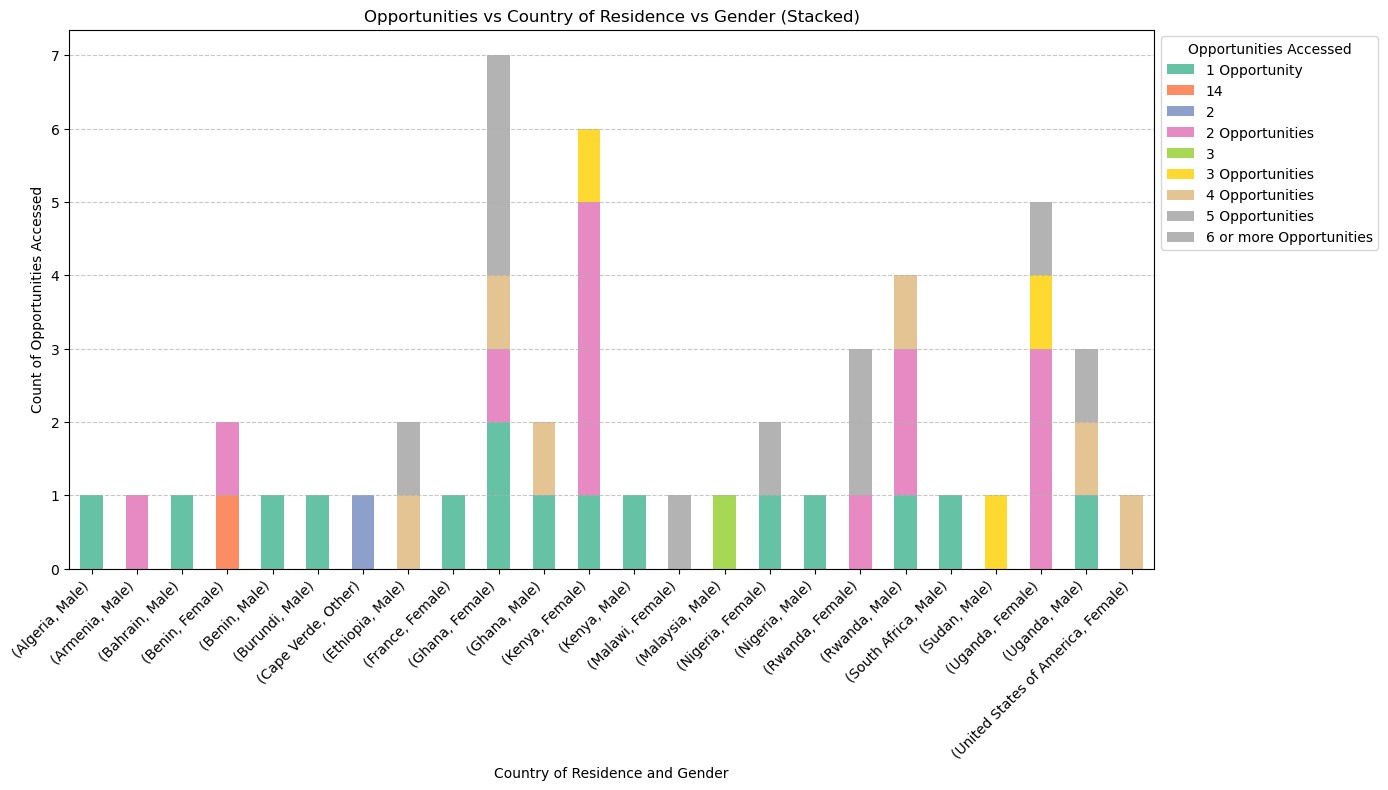

In [198]:
# Plot stacked bar chart for Opportunities vs Country of Residence vs Gender
opportunities_country_gender.plot(kind="bar", figsize=(14, 7), stacked=True, colormap="Set2")

# Customize labels and title
plt.title("Opportunities vs Country of Residence vs Gender (Stacked)")
plt.xlabel("Country of Residence and Gender")
plt.ylabel("Count of Opportunities Accessed")
plt.xticks(rotation=45, ha="right")  # Rotate for readability
plt.legend(title="Opportunities Accessed", bbox_to_anchor=(1, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


<h3> More univariate analysis </h3>

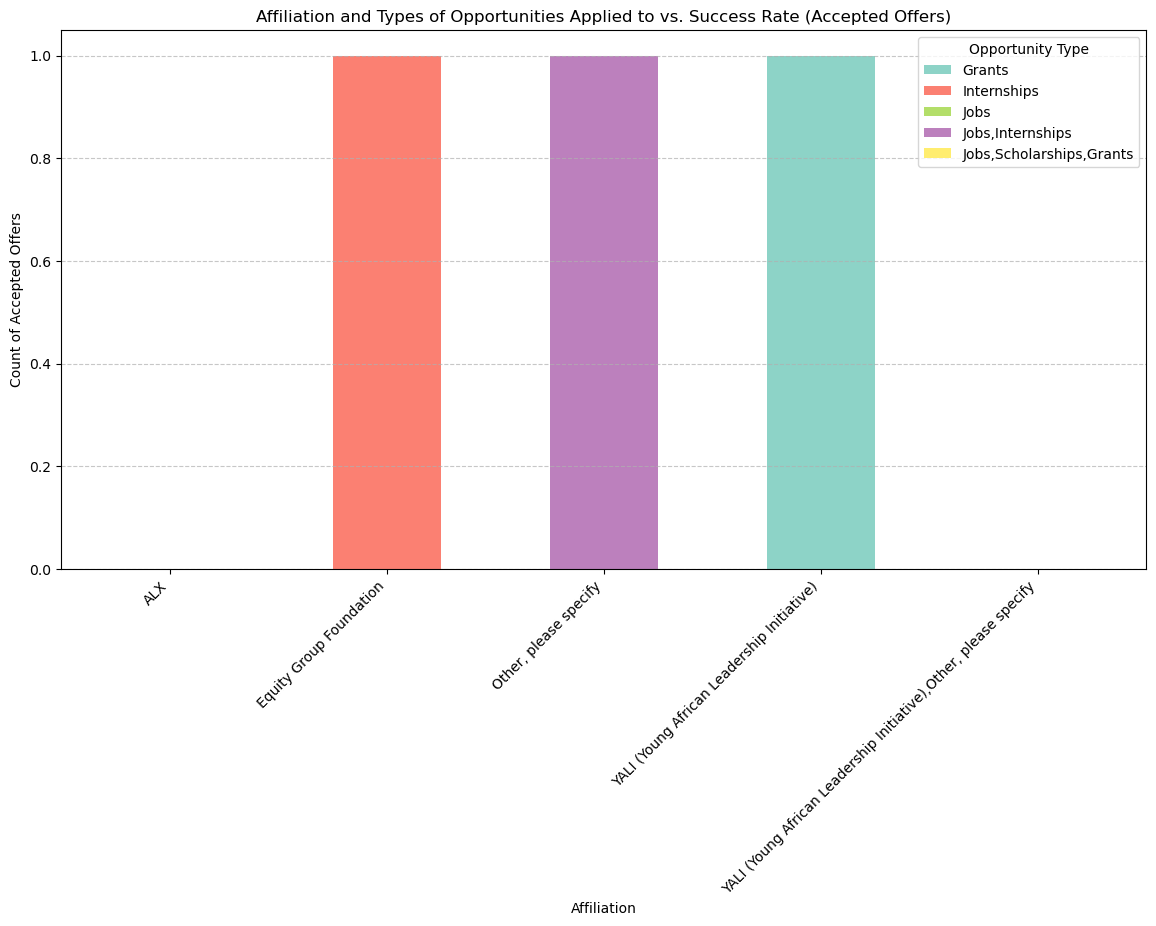

In [204]:
import matplotlib.pyplot as plt

# Ensure to check for any extra spaces in the column names
df.columns

# Now let's filter the data and create a pivot table
pivot_data = df.pivot_table(
    index="Please select your Mastercard Foundation institution(s) you are affiliated with - Selected Choice",  # Affiliation
    columns="What type of opportunities did you apply for? (Please select all that accurately apply to you) - Selected Choice",  # Opportunity Type
    values="Did you accept an offer or were you awarded any opportunities?",  # Success (Accepted Offer)
    aggfunc=lambda x: (x == "Yes").sum()  # Count the number of 'Yes' answers (Accepted Offers)
)

# Plot the data as a stacked bar chart
pivot_data.plot(kind="bar", stacked=True, figsize=(14,7), colormap="Set3")

# Customize labels and title
plt.title("Affiliation and Types of Opportunities Applied to vs. Success Rate (Accepted Offers)")
plt.xlabel("Affiliation")
plt.ylabel("Count of Accepted Offers")
plt.xticks(rotation=45, ha="right")  # Rotate for readability
plt.legend(title="Opportunity Type", bbox_to_anchor=(1,1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()




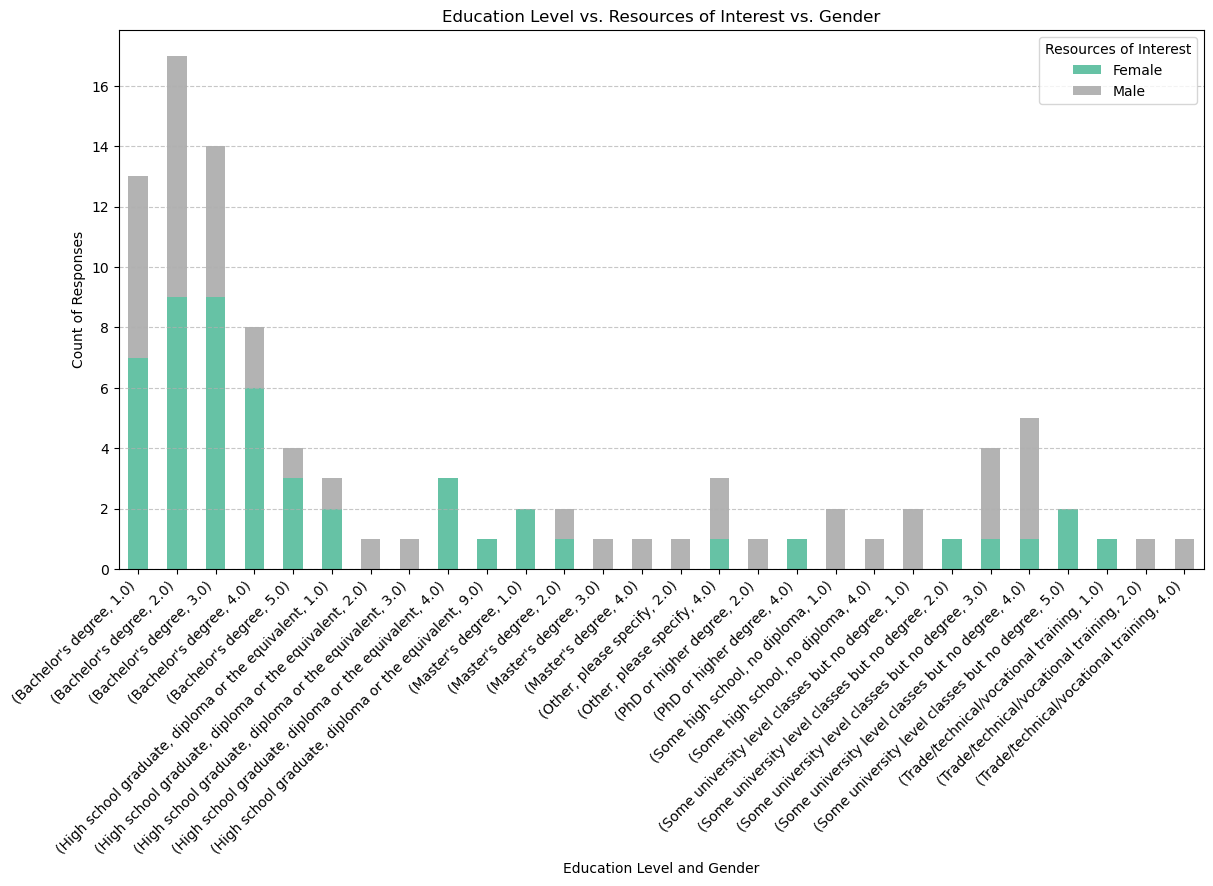

What is your gender?                                                                                   Female  \
What is the highest level of education you have... What resources are of interest to you on the Ba...           
Bachelor's degree                                  1.0                                                      7   
                                                   2.0                                                      9   
                                                   3.0                                                      9   
                                                   4.0                                                      6   
                                                   5.0                                                      3   
High school graduate, diploma or the equivalent    1.0                                                      2   
                                                   2.0                                                      0   
                                                   3.0                                                      0   
                                                   4.0                                                      3   
                                                   9.0                                                      1   
Master's degree                                    1.0                                                      2   
                                                   2.0                                                      1   
                                                   3.0                                                      0   
                                                   4.0                                                      0   
Other, please specify                              2.0                                                      0   
                                                   4.0                                                      1   
PhD or higher degree                               2.0                                                      0   
                                                   4.0                                                      1   
Some high school, no diploma                       1.0                                                      0   
                                                   4.0                                                      0   
Some university level classes but no degree        1.0                                                      0   
                                                   2.0                                                      1   
                                                   3.0                                                      1   
                                                   4.0                                                      1   
                                                   5.0                                                      2   
Trade/technical/vocational training                1.0                                                      1   
                                                   2.0                                                      0   
                                                   4.0                                                      0   

What is your gender?                                                                                   Male  
What is the highest level of education you have... What resources are of interest to you on the Ba...        
Bachelor's degree                                  1.0                                                    6  
                                                   2.0                                                    8  
                                                   3.0                                                    5  
                                                   4.0     

In [210]:
# Check the available columns to ensure proper column names are used
df.columns

# Group by Education Level, Resources of Interest, and Gender
education_resources_gender = df.groupby(['What is the highest level of education you have COMPLETED? - Selected Choice',
                                         'What resources are of interest to you on the Baobab Platform? (Drag to rank in order of priority) - Networking', 
                                         'What is your gender?']).size().unstack(fill_value=0)

# Plot the data as a stacked bar chart
education_resources_gender.plot(kind="bar", stacked=True, figsize=(14,7), colormap="Set2")

# Customize labels and title
plt.title("Education Level vs. Resources of Interest vs. Gender")
plt.xlabel("Education Level and Gender")
plt.ylabel("Count of Responses")
plt.xticks(rotation=45, ha="right")  # Rotate for readability
plt.legend(title="Resources of Interest", bbox_to_anchor=(1,1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

# View the resulting dataframe
education_resources_gender


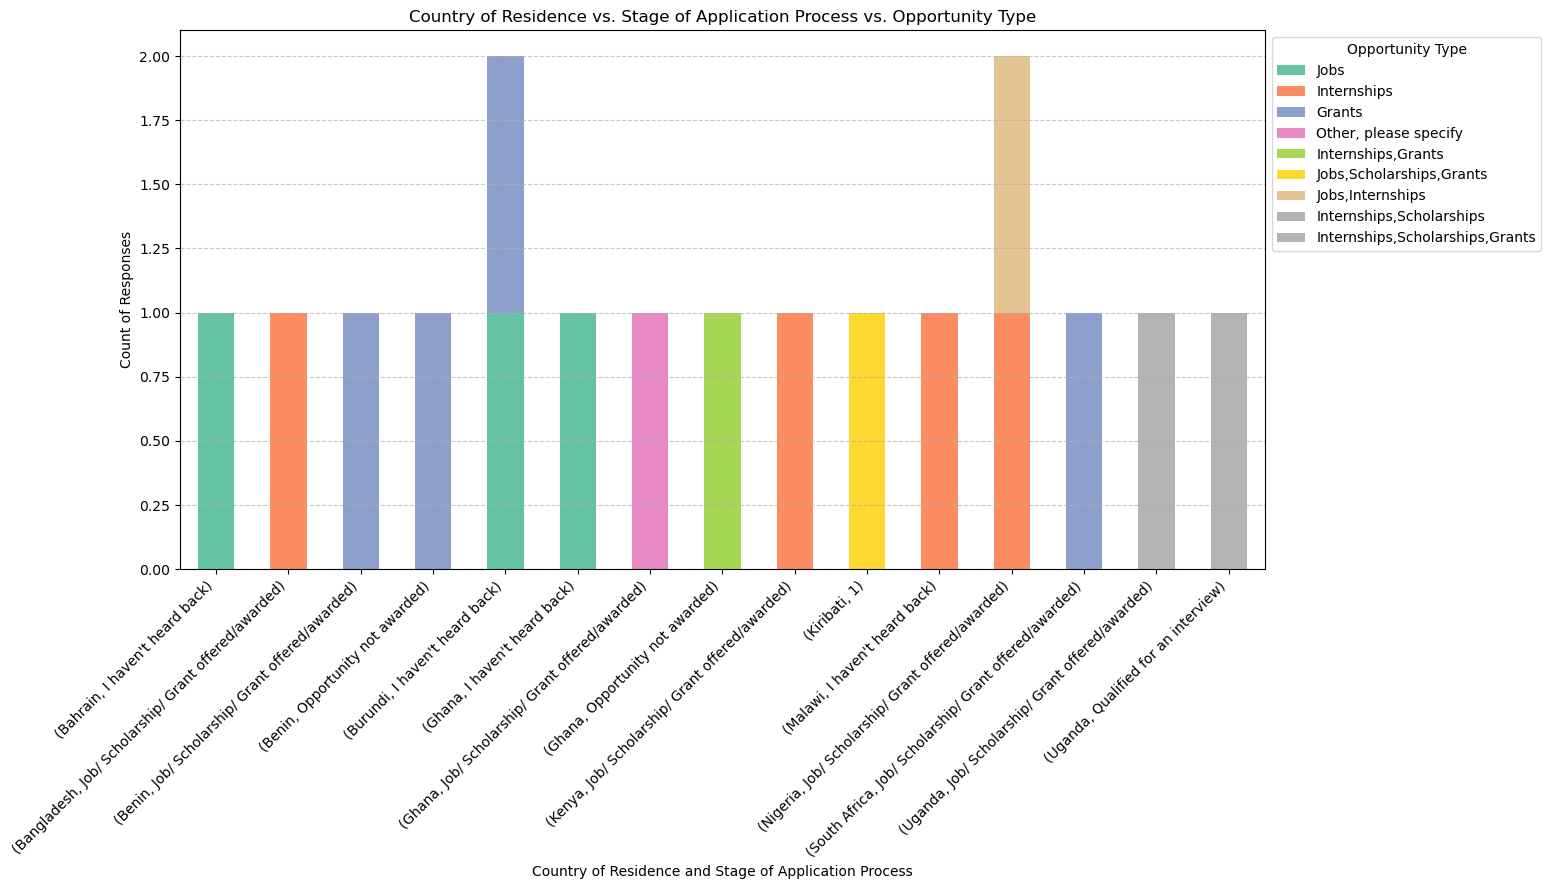

What type of opportunities did you apply for? (Please select all that accurately apply to you) - Selected Choice  Jobs  \
What is your country of birth? What stage of the application process did you r...                                        
Bahrain                        I haven't heard back                                                                  1   
Bangladesh                     Job/ Scholarship/ Grant offered/awarded                                               0   
Benin                          Job/ Scholarship/ Grant offered/awarded                                               0   
                               Opportunity not awarded                                                               0   
Burundi                        I haven't heard back                                                                  1   
Ghana                          I haven't heard back                                                                  1   
                               Job/ Scholarship/ Grant offered/awarded                                               0   
                               Opportunity not awarded                                                               0   
Kenya                          Job/ Scholarship/ Grant offered/awarded                                               0   
Kiribati                       1                                                                                     0   
Malawi                         I haven't heard back                                                                  0   
Nigeria                        Job/ Scholarship/ Grant offered/awarded                                               0   
South Africa                   Job/ Scholarship/ Grant offered/awarded                                               0   
Uganda                         Job/ Scholarship/ Grant offered/awarded                                               0   
                               Qualified for an interview                                                            0   

What type of opportunities did you apply for? (Please select all that accurately apply to you) - Selected Choice  Internships  \
What is your country of birth? What stage of the application process did you r...                                               
Bahrain                        I haven't heard back                                                                         0   
Bangladesh                     Job/ Scholarship/ Grant offered/awarded                                                      1   
Benin                          Job/ Scholarship/ Grant offered/awarded                                                      0   
                               Opportunity not awarded                                                                      0   
Burundi                        I haven't heard back                                                                         0   
Ghana                          I haven't heard back                                                                         0   
                               Job/ Scholarship/ Grant offered/awarded                                                      0   
                               Opportunity not awarded                                                                      0   
Kenya                          Job/ Scholarship/ Grant offered/awarded                                                      1   
Kiribati                       1                                                                                            0   
Malawi                         I haven't heard back                                                                         1   
Nigeria                        Job/ Scholarship/ Grant offered/awarded                                                      1   
South Africa                   Job/ Scholarship/ Grant offered/awarded                                                 

In [212]:
# Check the available columns to ensure proper column names are used
df.columns

# Group by Country of Residence, Stage of Application Process, and Opportunity Type
country_stage_opportunity = df.groupby(['What is your country of birth?',  # Country of Residence column
                                       'What stage of the application process did you reach after submitting your application? - Opportunity #1',  # Stage of Application Process
                                       'What type of opportunities did you apply for? (Please select all that accurately apply to you) - Selected Choice']).size().unstack(fill_value=0)

# Plot the data as a stacked bar chart
country_stage_opportunity.plot(kind="bar", stacked=True, figsize=(14,7), colormap="Set2")

# Customize labels and title
plt.title("Country of Residence vs. Stage of Application Process vs. Opportunity Type")
plt.xlabel("Country of Residence and Stage of Application Process")
plt.ylabel("Count of Responses")
plt.xticks(rotation=45, ha="right")  # Rotate for readability
plt.legend(title="Opportunity Type", bbox_to_anchor=(1,1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

# View the resulting dataframe
country_stage_opportunity


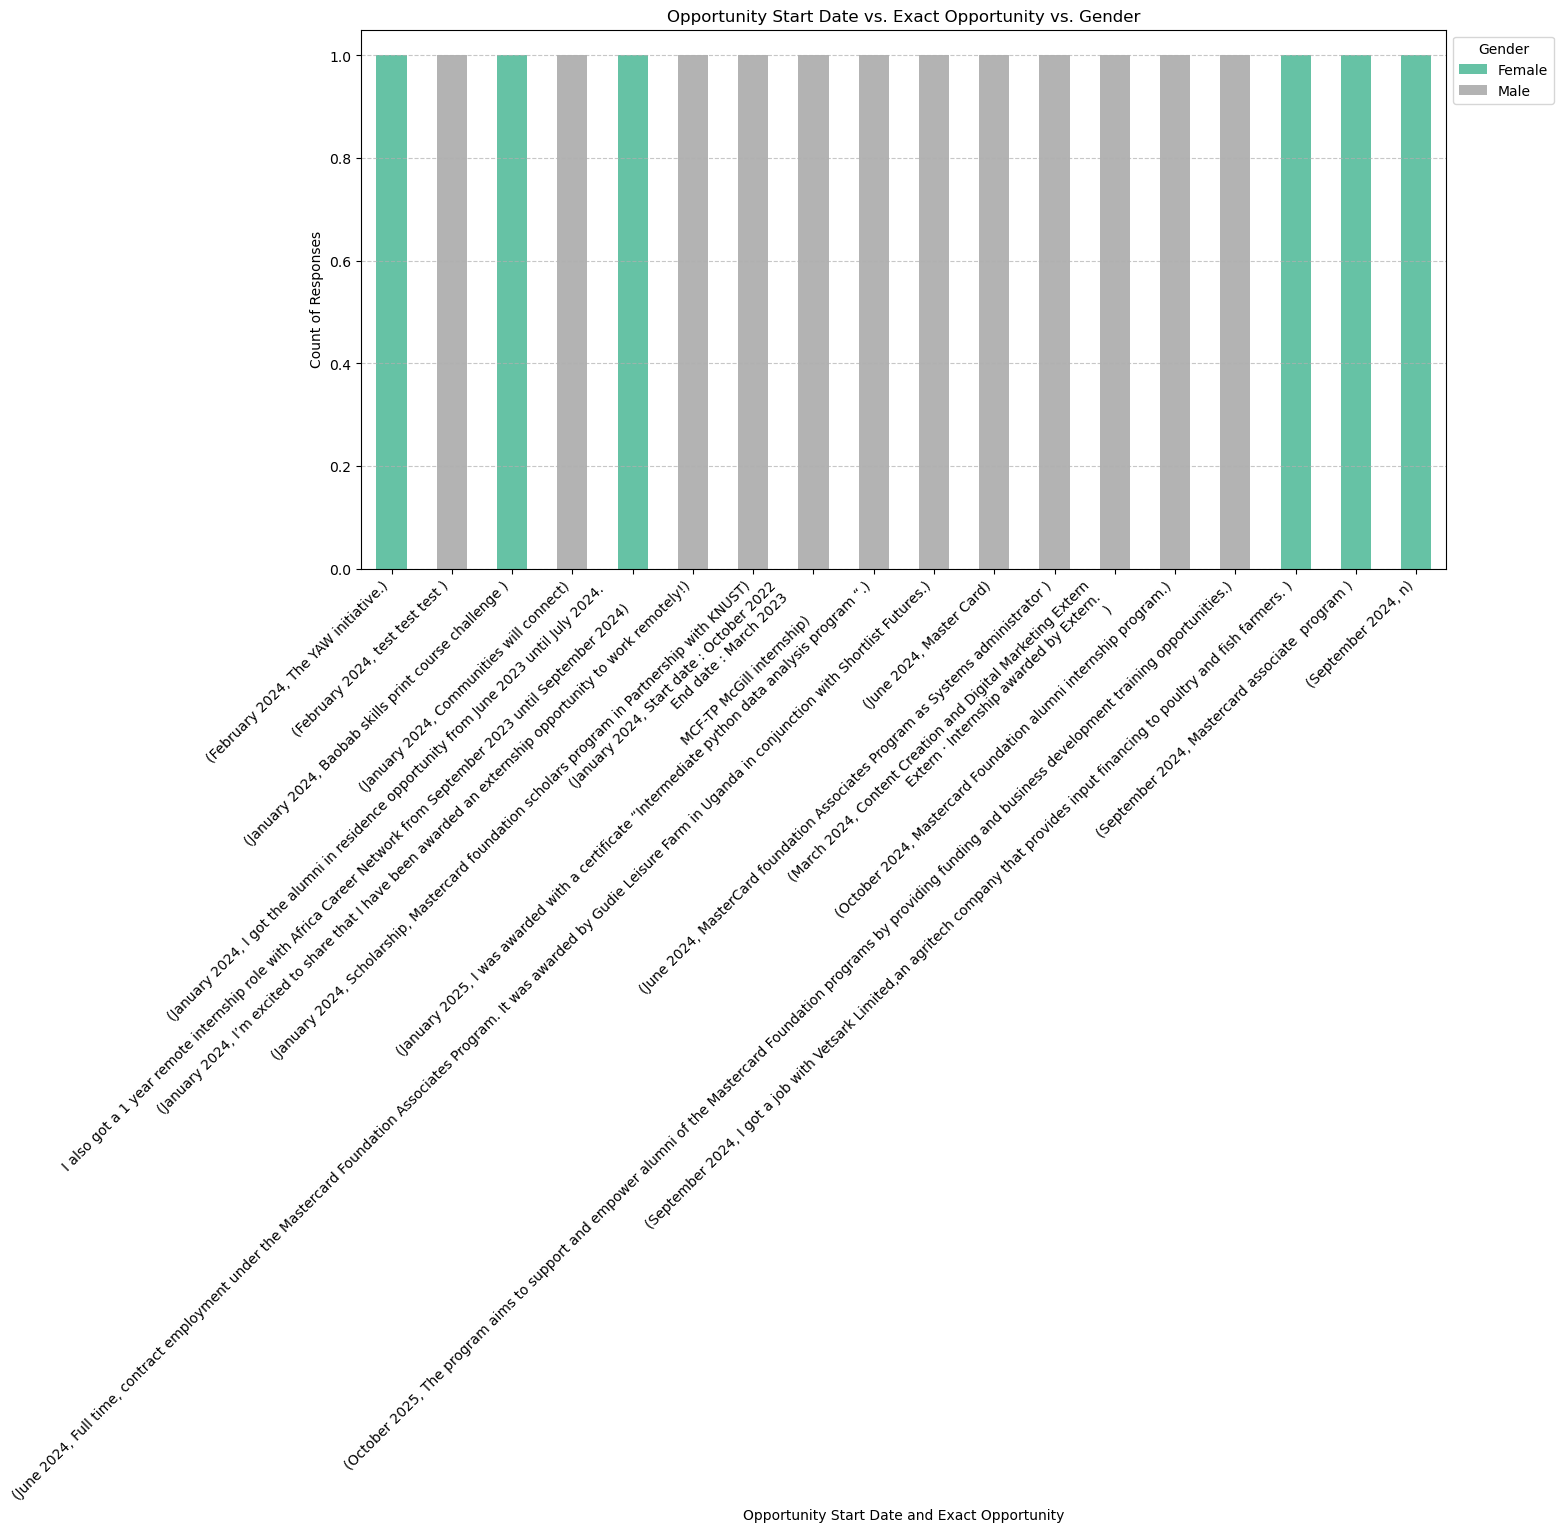

What is your gender?                                                                           Female  \
When was / is your opportunity start date? Please specify in detail the type of opportunit...           
February 2024                              The YAW initiative.                                      1   
                                           test test test                                           0   
January 2024                               Baobab skills print course challenge                     1   
                                           Communities will connect                                 0   
                                           I got the alumni in residence opportunity from ...       1   
                                           I’m excited to share that I have been awarded a...       0   
                                           Scholarship, Mastercard foundation scholars pro...       0   
                                           Start date : October 2022\nEnd date : March 202...       0   
January 2025                               I was awarded with a certificate “Intermediate ...       0   
June 2024                                  Full time, contract employment under the Master...       0   
                                           Master Card                                              0   
                                           MasterCard foundation Associates Program as Sys...       0   
March 2024                                 Content Creation and Digital Marketing Extern\n...       0   
October 2024                               Mastercard Foundation alumni internship program.         0   
October 2025                               The program aims to support and empower alumni ...       0   
September 2024                             I got a job with Vetsark Limited,an agritech co...       1   
                                           Mastercard associate  program                            1   
                                           n                                                        1   

What is your gender?                                                                           Male  
When was / is your opportunity start date? Please specify in detail the type of opportunit...        
February 2024                              The YAW initiative.                                    0  
                                           test test test                                         1  
January 2024                               Baobab skills print course challenge                   0  
                                           Communities will connect                               1  
                                           I got the alumni in residence opportunity from ...     0  
                                           I’m excited to share that I have been awarded a...     1  
                                           Scholarship, Mastercard foundation scholars pro...     1  
                                           Start date : October 2022\nEnd date : March 202...     1  
January 2025                               I was awarded with a certificate “Intermediate ...     1  
June 2024                                  Full time, contract employment under the Master...     1  
                                           Master Card                                            1  
                                           MasterCard foundation Associates Program as Sys...     1  
March 2024                                 Content Creation and Digital Marketing Extern\n...     1  
October 2024                               Mastercard Foundation alumni internship program.       1  
October 2025                               The program aims to support and empower alumni ...     1  
September 2024                             I got a job with Vetsark Limited,an agritech co...     0  
                                           Mastercard associate

In [215]:
# Check available columns to ensure proper column names are used
df.columns

# Group by Opportunity Start Date, Exact Opportunity, and Gender
opportunity_gender_data = df.groupby(['When was / is your opportunity start date?',  # Opportunity Start Date
                                     'Please specify in detail the type of opportunity and who awarded the opportunity',  # Exact Opportunity
                                     'What is your gender?']).size().unstack(fill_value=0)

# Plot the data as a stacked bar chart
opportunity_gender_data.plot(kind="bar", stacked=True, figsize=(14,7), colormap="Set2")

# Customize labels and title
plt.title("Opportunity Start Date vs. Exact Opportunity vs. Gender")
plt.xlabel("Opportunity Start Date and Exact Opportunity")
plt.ylabel("Count of Responses")
plt.xticks(rotation=45, ha="right")  # Rotate for readability
plt.legend(title="Gender", bbox_to_anchor=(1,1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

# View the resulting dataframe
opportunity_gender_data
